Script for formatting the MIT-Normal Sinus Rhythm Database
Steps:

    1. Download the ZIP database from https://physionet.org/content/nsrdb/1.0.0/
    2. Open it with a zip-opener (WinZip, 7zip).
    3. Extract the folder of the same name (named 'mit-bih-normal-sinus-rhythm-database-1.0.0') to the same folder as this script.
    4. Run this script.

##### Credits:
    https://github.com/berndporr/py-ecg-detectors/blob/master/tester_MITDB.py

In [ ]:
!wget -r -N -c -np https://physionet.org/files/nsrdb/1.0.0/

In [2]:
root_path = "/content/physionet.org"
folder_path = "/content/physionet.org/files/nsrdb/1.0.0"

In [ ]:
!pip install wfdb
!pip install neurokit2
!pip install matplotlib==3.1.3


In [21]:
import pandas as pd
import numpy as np
import wfdb
import os
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)

data_files = [folder_path+"/" + file for file in os.listdir(folder_path) if ".dat" in file]


In [5]:
data_files

['/content/physionet.org/files/nsrdb/1.0.0/19140.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/17052.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/19093.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/16795.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/19090.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/18177.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/16786.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/19088.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/16272.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/18184.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/16539.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/16265.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/17453.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/19830.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/16483.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/16773.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/16273.dat',
 '/content/physionet.org/files/nsrdb/1.0.0/16420.dat']

In [ ]:
dfs_ecg = []
dfs_rpeaks = []

for participant, file in enumerate(data_files):

    print("Participant: " + str(participant + 1) + "/" + str(len(data_files)))
    # Get signal
    data = pd.DataFrame({"ECG": wfdb.rdsamp(file[:-4])[0][:, 1]})
    data["Participant"] = "MIT-Normal_%.2i" %(participant)
    data["Sample"] = range(len(data))
    data["Sampling_Rate"] = 128
    data["Database"] = "MIT-Normal"

    # getting annotations
    anno = wfdb.rdann(file[:-4], 'atr')
    anno = anno.sample[np.where(np.array(anno.symbol) == "N")[0]]
    anno = pd.DataFrame({"Rpeaks": anno})
    anno["Participant"] = "MIT-Normal_%.2i" %(participant)
    anno["Sampling_Rate"] = 128
    anno["Database"] = "MIT-Normal"

    # Select only 1h of recording (otherwise it's too big)
    data = data[460800:460800*3].reset_index(drop=True)
    anno = anno[(anno["Rpeaks"] > 460800) & (anno["Rpeaks"] <= 460800*2)].reset_index(drop=True)
    anno["Rpeaks"] = anno["Rpeaks"] - 460800


    # Store with the rest
    dfs_ecg.append(data)
    dfs_rpeaks.append(anno)

# Save
df_ecg = pd.concat(dfs_ecg).to_csv("ECGs.csv", index=False)
df_rpeaks = pd.concat(dfs_rpeaks).to_csv("Rpeaks.csv", index=False)

In [26]:
pd.concat(dfs_ecg)


ECG    Participant   Sample  Sampling_Rate    Database
0      -0.055  MIT-Normal_00   460800            128  MIT-Normal
1      -0.055  MIT-Normal_00   460801            128  MIT-Normal
2      -0.045  MIT-Normal_00   460802            128  MIT-Normal
3      -0.055  MIT-Normal_00   460803            128  MIT-Normal
4      -0.045  MIT-Normal_00   460804            128  MIT-Normal
...       ...            ...      ...            ...         ...
921595 -0.085  MIT-Normal_17  1382395            128  MIT-Normal
921596 -0.085  MIT-Normal_17  1382396            128  MIT-Normal
921597 -0.085  MIT-Normal_17  1382397            128  MIT-Normal
921598 -0.045  MIT-Normal_17  1382398            128  MIT-Normal
921599  0.015  MIT-Normal_17  1382399            128  MIT-Normal

[16588800 rows x 5 columns]

In [28]:
pd.read_csv("/content/Rpeaks.csv")

Rpeaks    Participant  Sampling_Rate    Database
0          61  MIT-Normal_00            128  MIT-Normal
1         164  MIT-Normal_00            128  MIT-Normal
2         258  MIT-Normal_00            128  MIT-Normal
3         351  MIT-Normal_00            128  MIT-Normal
4         442  MIT-Normal_00            128  MIT-Normal
...       ...            ...            ...         ...
87366  460455  MIT-Normal_17            128  MIT-Normal
87367  460542  MIT-Normal_17            128  MIT-Normal
87368  460627  MIT-Normal_17            128  MIT-Normal
87369  460712  MIT-Normal_17            128  MIT-Normal
87370  460794  MIT-Normal_17            128  MIT-Normal

[87371 rows x 4 columns]

In [23]:
anno

Rpeaks    Participant  Sampling_Rate    Database
0         23  MIT-Normal_17            128  MIT-Normal
1        130  MIT-Normal_17            128  MIT-Normal
2        237  MIT-Normal_17            128  MIT-Normal
3        343  MIT-Normal_17            128  MIT-Normal
4        450  MIT-Normal_17            128  MIT-Normal
...      ...            ...            ...         ...
5033  460455  MIT-Normal_17            128  MIT-Normal
5034  460542  MIT-Normal_17            128  MIT-Normal
5035  460627  MIT-Normal_17            128  MIT-Normal
5036  460712  MIT-Normal_17            128  MIT-Normal
5037  460794  MIT-Normal_17            128  MIT-Normal

[5038 rows x 4 columns]

In [29]:
data

ECG    Participant   Sample  Sampling_Rate    Database
0      -0.095  MIT-Normal_17   460800            128  MIT-Normal
1      -0.115  MIT-Normal_17   460801            128  MIT-Normal
2      -0.115  MIT-Normal_17   460802            128  MIT-Normal
3      -0.115  MIT-Normal_17   460803            128  MIT-Normal
4      -0.115  MIT-Normal_17   460804            128  MIT-Normal
...       ...            ...      ...            ...         ...
921595 -0.085  MIT-Normal_17  1382395            128  MIT-Normal
921596 -0.085  MIT-Normal_17  1382396            128  MIT-Normal
921597 -0.085  MIT-Normal_17  1382397            128  MIT-Normal
921598 -0.045  MIT-Normal_17  1382398            128  MIT-Normal
921599  0.015  MIT-Normal_17  1382399            128  MIT-Normal

[921600 rows x 5 columns]

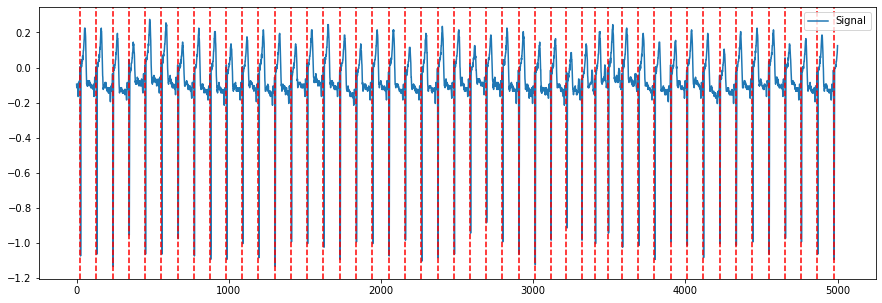

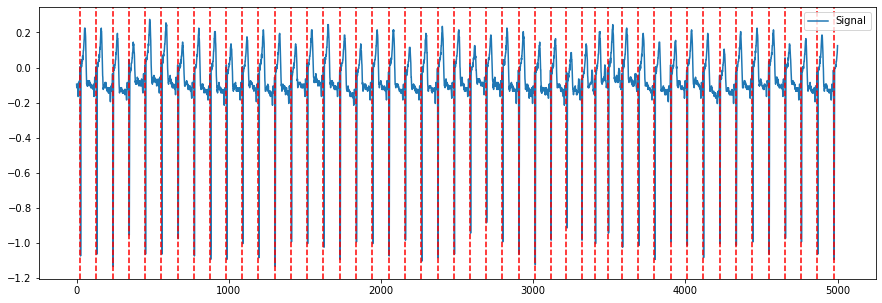

In [22]:
# Quick test
import neurokit2 as nk
nk.events_plot(anno["Rpeaks"][anno["Rpeaks"] <= 5000], data["ECG"][0:5001])

In [ ]:
# df_ecg = pd.concat(dfs_ecg).to_csv("/content/drive/MyDrive/Arrythmia /ECGs.csv", index=False)


### Pan tompkins RR Interval

In [30]:
!pip install hrv-analysis
!pip install neurokit2
!pip3 install py-ecg-detectors

     |████████████████████████████████| 554 kB 7.7 MB/s 
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43818 sha256=81dfccd1b88162e6cb5d933797659c7d62a22fb5601c582980f4aff224691128
  Stored in directory: /root/.cache/pip/wheels/1f/c1/4c/8de278f816259b4f67e2356c0bda260a593375661e400bf31f
Successfully built gatspy


In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn
import itertools

import matplotlib as mpl
mpl.style.use('seaborn')
plt.rcParams["figure.figsize"] = (13,4)

import matplotlib.pyplot as plt 
from os import listdir 
import requests
import matplotlib.pyplot as plt
from os import listdir, mkdir, system
from os.path import isfile, isdir, join, exists
import json
import os
from tqdm import tqdm
from matplotlib import collections as matcoll
import pywt

In [32]:
from ecgdetectors import Detectors
import neurokit2 as nk
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values
from hrvanalysis import get_time_domain_features


In [33]:
master_ecg = pd.read_csv("/content/ECGs.csv")
list_of_patients = master_ecg['Participant'].unique()

100%|██████████| 18/18 [00:21<00:00,  1.20s/it]


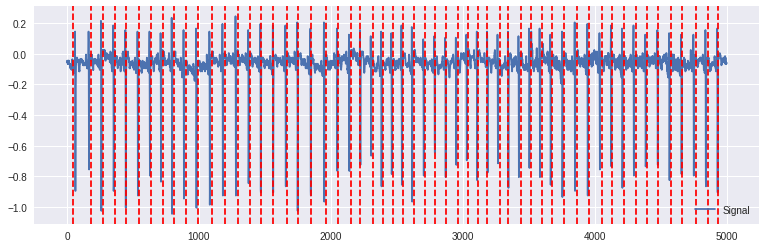

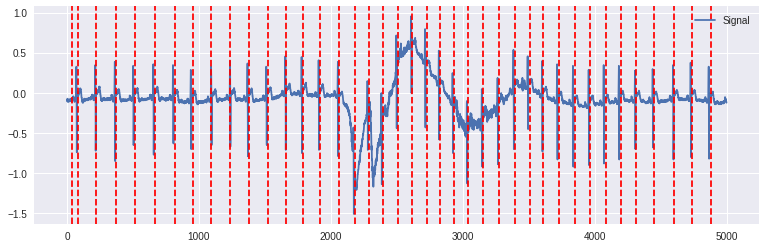

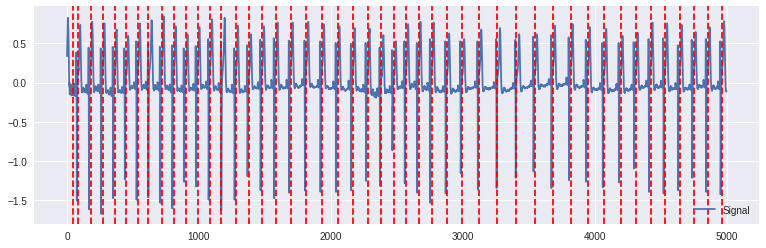

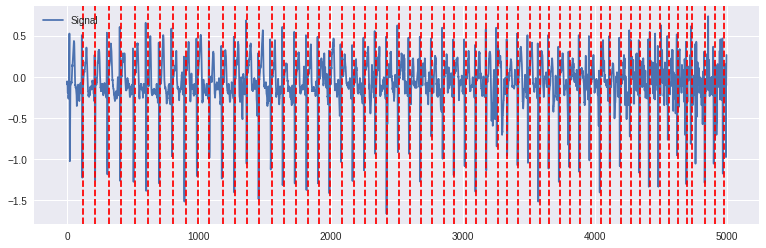

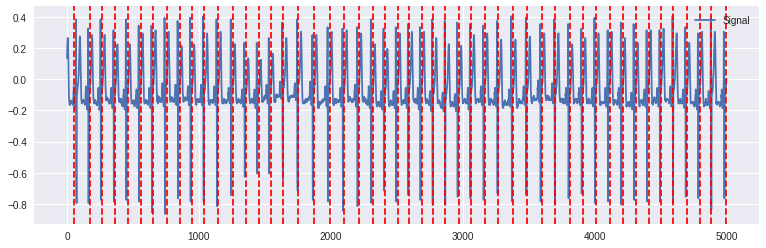

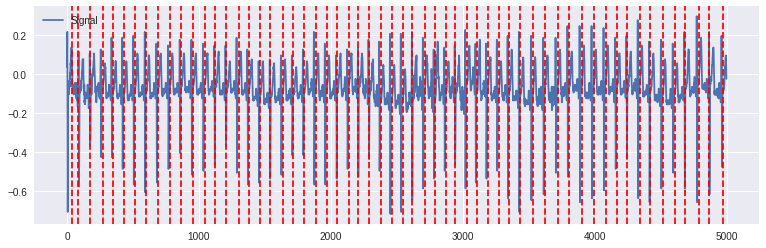

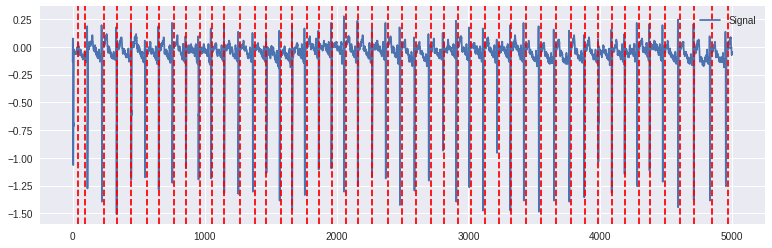

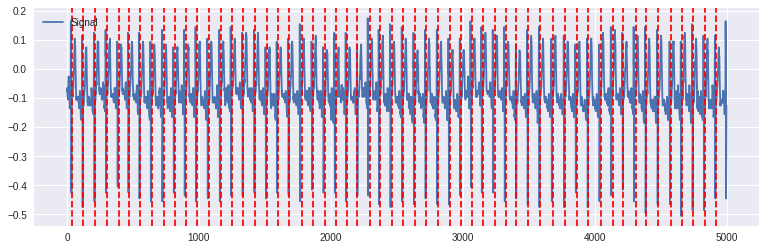

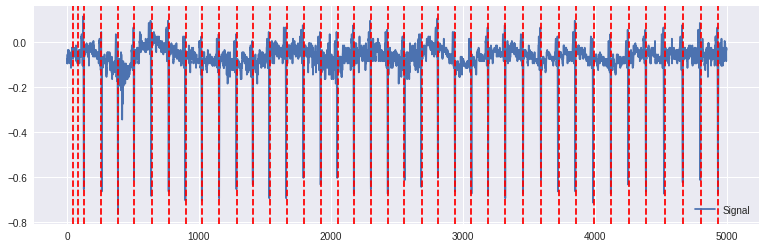

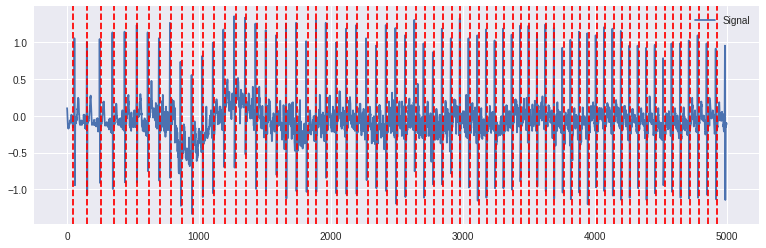

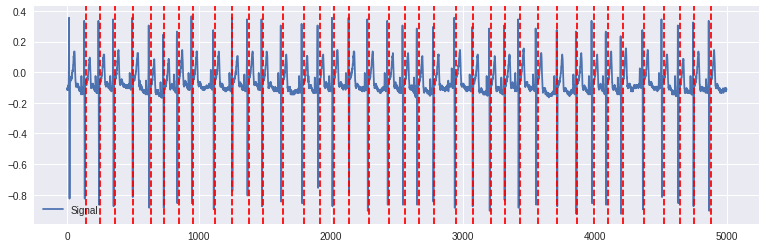

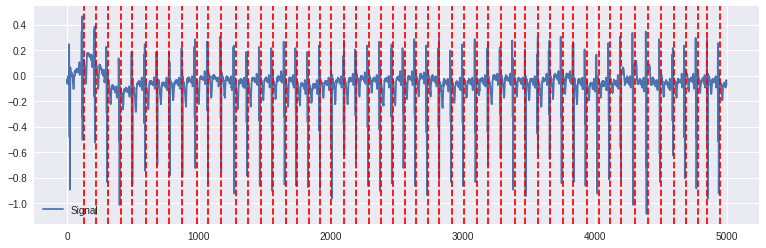

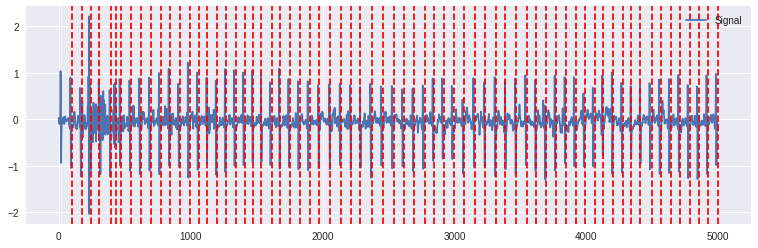

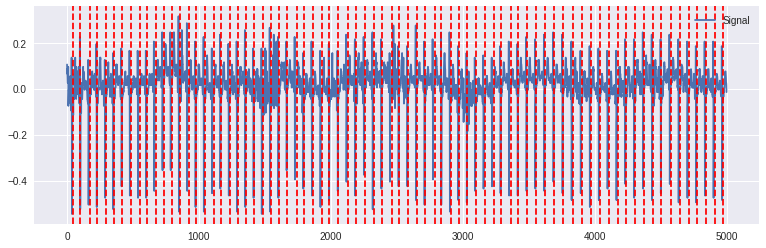

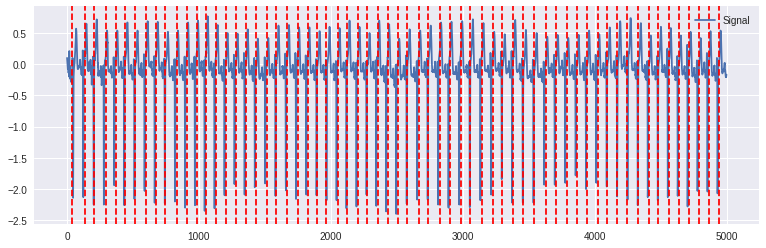

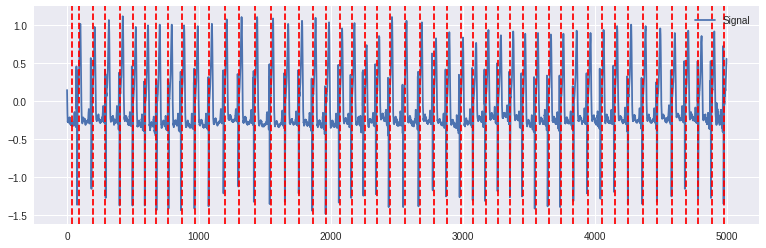

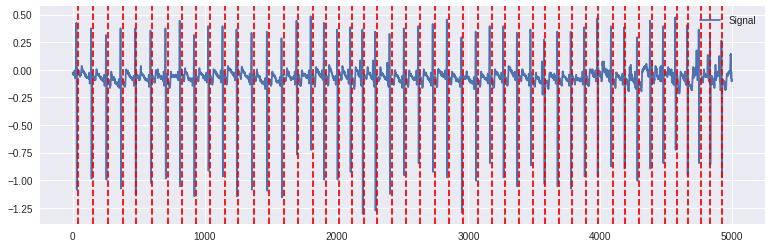

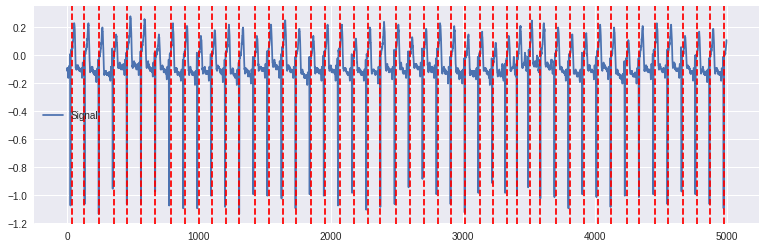

In [41]:
data_with_rr = pd.DataFrame()
detectors = Detectors(128) #specify sampling rate
for i in tqdm(list_of_patients):
    df=master_ecg[master_ecg['Participant']==i][:5000]
    df.reset_index(inplace=True,drop=True)
    unfiltered_ecg=df["ECG"]
    detector = "pan_tompkins"
    if(detector=="pan_tompkins"):
      rpeaks = detectors.pan_tompkins_detector(unfiltered_ecg)
    elif(detector=="stationary_wavelet_transform"):
      rpeaks = detectors.swt_detector(unfiltered_ecg)
    nk.events_plot(rpeaks,unfiltered_ecg)
    rrintervals = np.array(rpeaks)
    rr_diff = rrintervals
    rr_in_df = pd.DataFrame(rr_diff)
    rr_in_df['filename']=i
    data_with_rr=data_with_rr.append(rr_in_df)
    


In [ ]:
data_with_rr.to_csv("RR_pan_tompkins.csv",index=False)

In [ ]:
data_with_rr.columns=['Rpeaks','Participant']

In [ ]:
my_rr=pd.read_csv("/content/RR_pan_tompkins.csv")
ori_rr=pd.read_csv("/content/Rpeaks.csv")
df_comp = pd.DataFrame(columns=['Participant','mean_pan_t','mean_ori','max_pan_t','max_ori','min_pan_t','min_ori'])


for i in tqdm(list_of_patients):
  df1=my_rr[my_rr['Participant']==i]
  df2=ori_rr[ori_rr['Participant']==i]
  rr1=np.diff(df1['Rpeaks'])
  rr2=np.diff(df2['Rpeaks'])
  mean_r1 = np.mean(rr1)
  mean_r2 = np.mean(rr2)

  max_r1 = max(rr1)
  max_r2 = max(rr2)

  min_r1 = min(rr1)
  min_r2 = min(rr2)

  lst = [i,mean_r1,mean_r2,max_r1,max_r2,min_r1,min_r2]

  df_comp.loc[len(df_comp)] = lst


  

100%|██████████| 18/18 [00:00<00:00, 21.64it/s]


In [ ]:
df_comp.to_csv("compared.csv",index=False)

In [38]:
master_ecg

ECG    Participant   Sample  Sampling_Rate    Database
0        -0.055  MIT-Normal_00   460800            128  MIT-Normal
1        -0.055  MIT-Normal_00   460801            128  MIT-Normal
2        -0.045  MIT-Normal_00   460802            128  MIT-Normal
3        -0.055  MIT-Normal_00   460803            128  MIT-Normal
4        -0.045  MIT-Normal_00   460804            128  MIT-Normal
...         ...            ...      ...            ...         ...
16588795 -0.085  MIT-Normal_17  1382395            128  MIT-Normal
16588796 -0.085  MIT-Normal_17  1382396            128  MIT-Normal
16588797 -0.085  MIT-Normal_17  1382397            128  MIT-Normal
16588798 -0.045  MIT-Normal_17  1382398            128  MIT-Normal
16588799  0.015  MIT-Normal_17  1382399            128  MIT-Normal

[16588800 rows x 5 columns]

### Neurokit RR Extraction

100%|██████████| 18/18 [00:21<00:00,  1.18s/it]


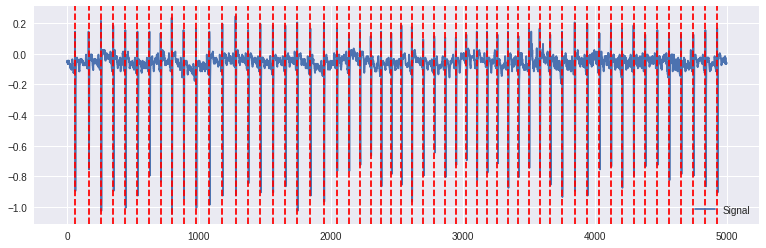

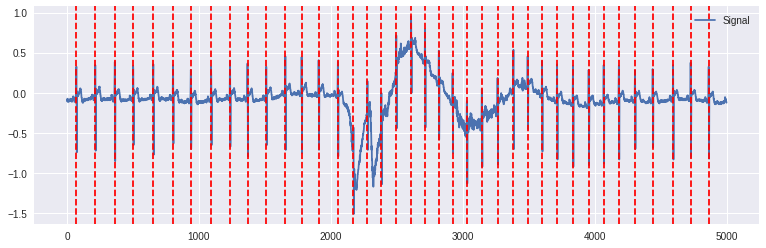

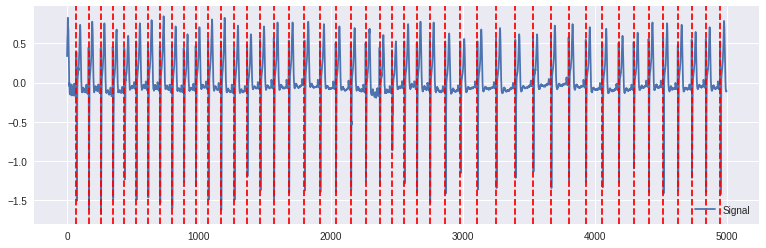

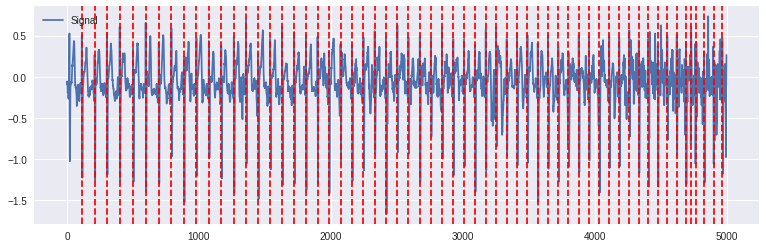

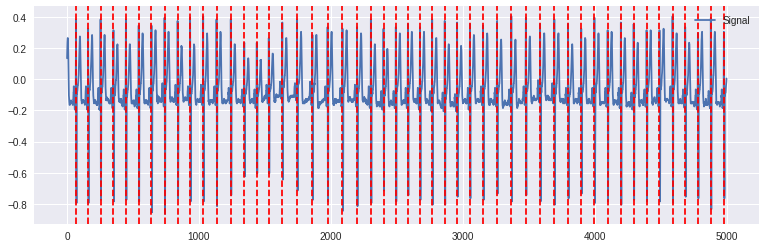

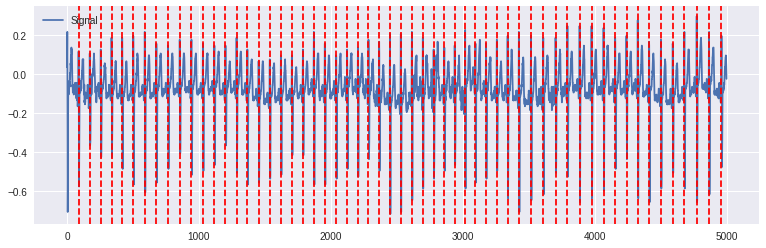

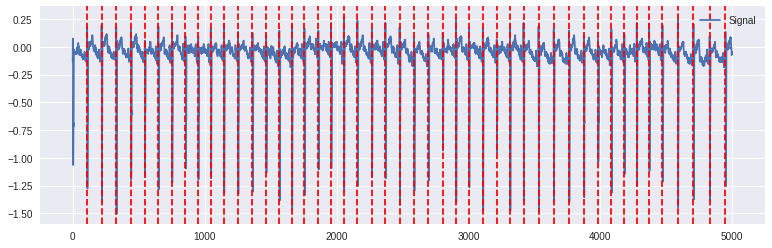

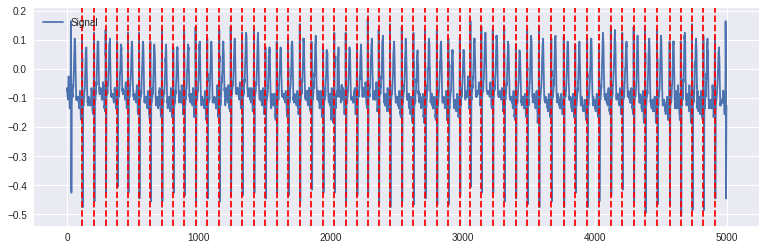

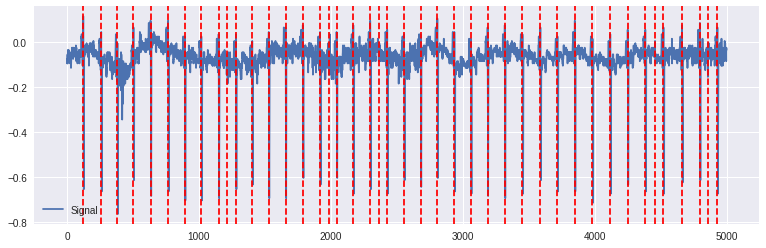

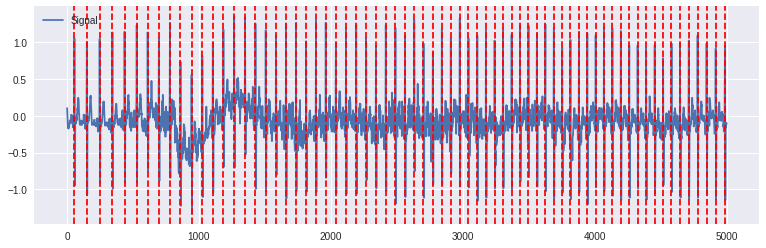

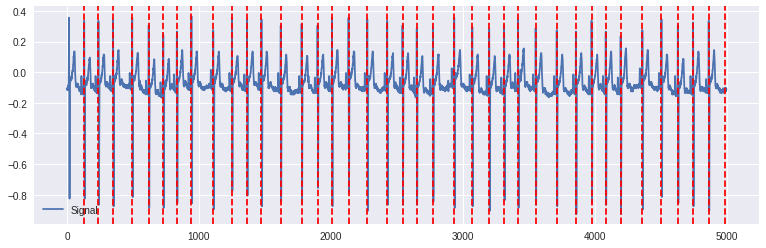

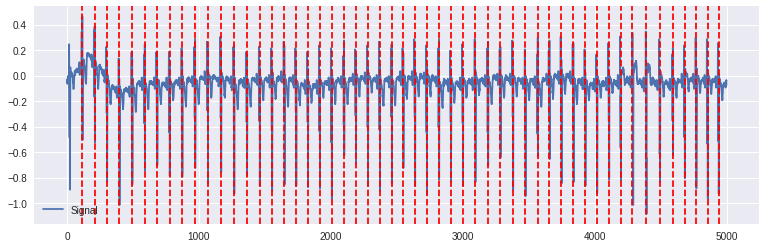

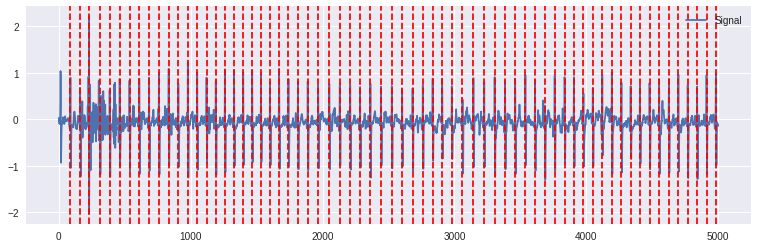

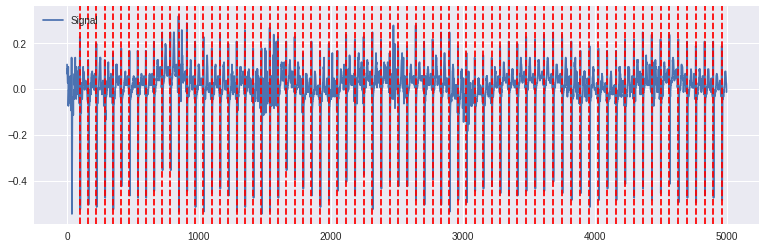

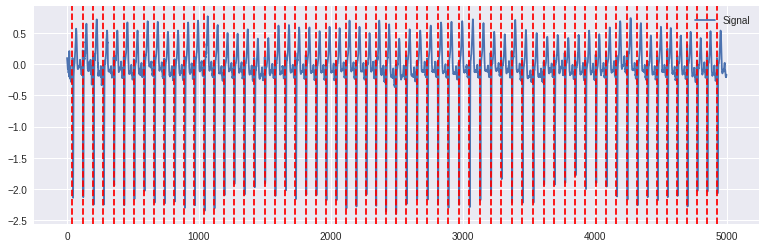

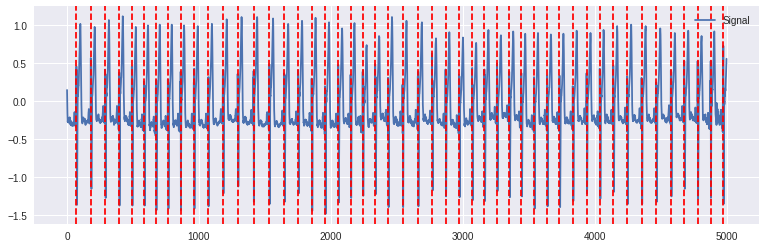

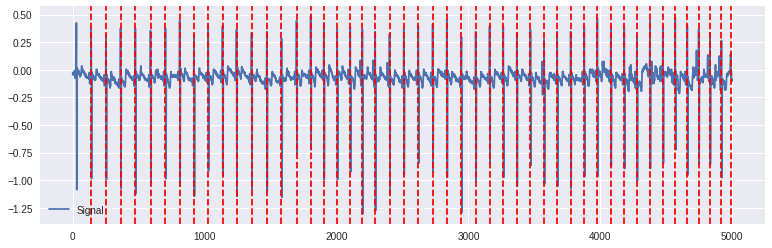

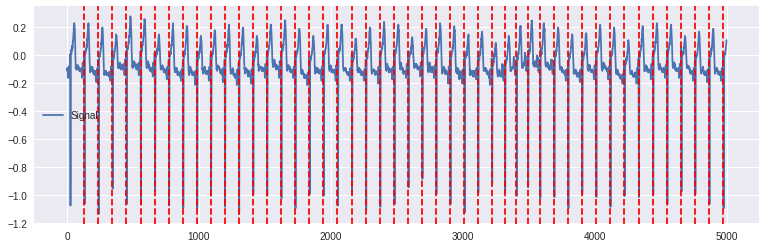

In [45]:
master_ecg = pd.read_csv("/content/ECGs.csv")
list_of_patients = master_ecg['Participant'].unique()
data_with_rr = pd.DataFrame()

for i in tqdm(list_of_patients):
    df=master_ecg[master_ecg['Participant']==i]
    df.reset_index(inplace=True,drop=True)
    unfiltered_ecg=df["ECG"][:5000]
    _, rpeaks = nk.ecg_peaks( unfiltered_ecg, sampling_rate=128) #specify smapling rate
    r_peaks = rpeaks['ECG_R_Peaks']
    # nk.events_plot(rpeaks['ECG_R_Peaks'][rpeaks['ECG_R_Peaks']<=2000], unfiltered_ecg[0:2000])
    nk.events_plot(rpeaks['ECG_R_Peaks'],unfiltered_ecg)

    rrintervals = np.array(r_peaks)
    rr_diff = rrintervals
    rr_in_df = pd.DataFrame(rr_diff)
    rr_in_df['Participant']=i
    data_with_rr=data_with_rr.append(rr_in_df)
data_with_rr.columns=['Rpeaks','Participant']

In [43]:
# data_with_rr.to_csv("RR_neurokit.csv",index=False)

In [ ]:
!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/

In [47]:
folder_path = "/content/physionet.org/files/mitdb/1.0.0"
data_files = [folder_path+"/" + file for file in os.listdir(folder_path) if ".dat" in file]

In [49]:
len(data_files)

48

In [58]:
dfs_ecg = []
dfs_rpeaks = []

for participant, file in enumerate(data_files):

    print("Participant: " + str(participant + 1) + "/" + str(len(data_files)))
    # Get signal
    data = pd.DataFrame({"ECG": wfdb.rdsamp(file[:-4])[0][:, 1]})
    data["Participant"] = "MIT-Arr_%.2i" %(participant)
    data["Sample"] = range(len(data))
    data["Sampling_Rate"] = 360
    data["Database"] = "MIT-Arr"

    # getting annotations
    anno = wfdb.rdann(file[:-4], 'atr')
    anno = anno.sample[np.where(np.array(anno.symbol) == "N")[0]]
    anno = pd.DataFrame({"Rpeaks": anno})
    anno["Participant"] = "MIT-Arr_%.2i" %(participant)
    anno["Sampling_Rate"] = 360
    anno["Database"] = "MIT-Arr"

    # Select only 1h of recording (otherwise it's too big)
    data = data[460800:460800*3].reset_index(drop=True)
    anno = anno[(anno["Rpeaks"] > 460800) & (anno["Rpeaks"] <= 460800*2)].reset_index(drop=True)
    anno["Rpeaks"] = anno["Rpeaks"] - 460800


    # Store with the rest
    dfs_ecg.append(data)
    dfs_rpeaks.append(anno)

# Save
df_ecg = pd.concat(dfs_ecg).to_csv("ECGs_mitdb.csv", index=False)
df_rpeaks = pd.concat(dfs_rpeaks).to_csv("Rpeaks_mitdb.csv", index=False)

Participant: 1/48
Participant: 2/48
Participant: 3/48
Participant: 4/48
Participant: 5/48
Participant: 6/48
Participant: 7/48
Participant: 8/48
Participant: 9/48
Participant: 10/48
Participant: 11/48
Participant: 12/48
Participant: 13/48
Participant: 14/48
Participant: 15/48
Participant: 16/48
Participant: 17/48
Participant: 18/48
Participant: 19/48
Participant: 20/48
Participant: 21/48
Participant: 22/48
Participant: 23/48
Participant: 24/48
Participant: 25/48
Participant: 26/48
Participant: 27/48
Participant: 28/48
Participant: 29/48
Participant: 30/48
Participant: 31/48
Participant: 32/48
Participant: 33/48
Participant: 34/48
Participant: 35/48
Participant: 36/48
Participant: 37/48
Participant: 38/48
Participant: 39/48
Participant: 40/48
Participant: 41/48
Participant: 42/48
Participant: 43/48
Participant: 44/48
Participant: 45/48
Participant: 46/48
Participant: 47/48
Participant: 48/48


In [59]:
pd.concat(dfs_ecg)

ECG Participant  Sample  Sampling_Rate Database
0      -0.165  MIT-Arr_00  460800            360  MIT-Arr
1      -0.160  MIT-Arr_00  460801            360  MIT-Arr
2      -0.150  MIT-Arr_00  460802            360  MIT-Arr
3      -0.145  MIT-Arr_00  460803            360  MIT-Arr
4      -0.145  MIT-Arr_00  460804            360  MIT-Arr
...       ...         ...     ...            ...      ...
189195  0.075  MIT-Arr_47  649995            360  MIT-Arr
189196  0.065  MIT-Arr_47  649996            360  MIT-Arr
189197  0.075  MIT-Arr_47  649997            360  MIT-Arr
189198  0.100  MIT-Arr_47  649998            360  MIT-Arr
189199  0.000  MIT-Arr_47  649999            360  MIT-Arr

[9081600 rows x 5 columns]

##### Neurokit on MIT Arrhythmia

 42%|████▏     | 20/48 [00:14<00:23,  1.20it/s]/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
 44%|████▍     | 21/48 [00:15<00:23,  1.13it/s]/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
 46%|████▌     | 22/48 [00:16<00:22,  1.16it/s]/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/co

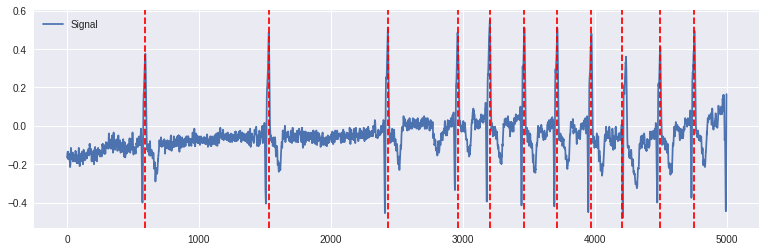

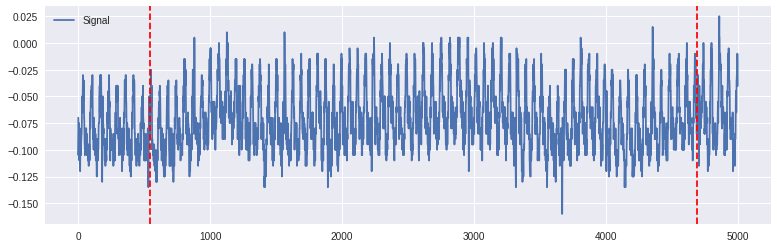

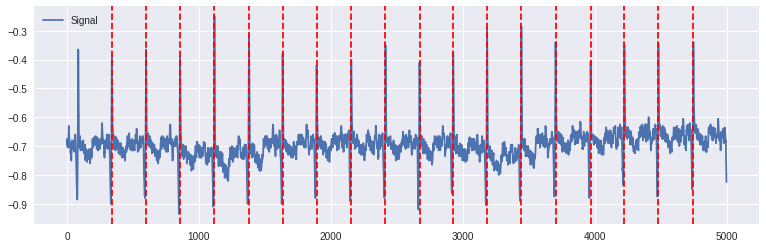

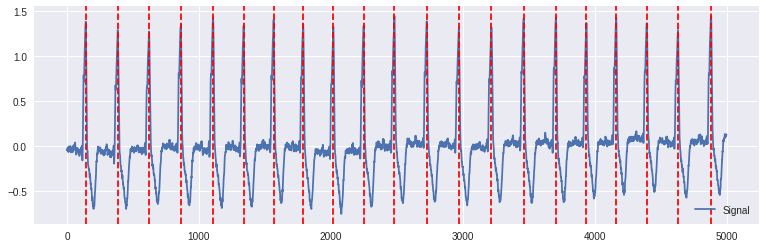

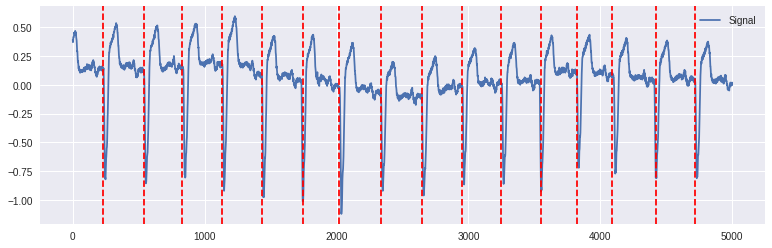

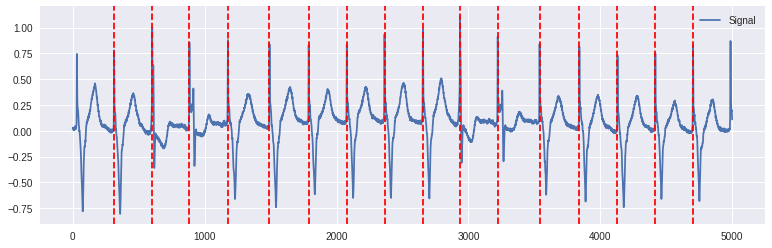

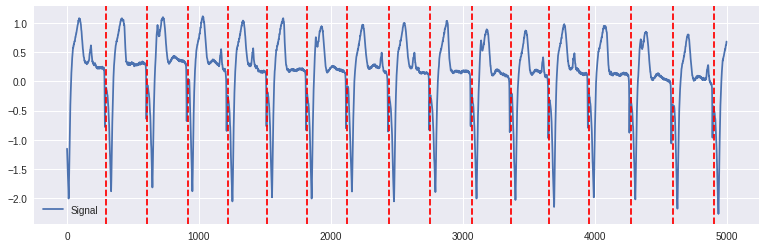

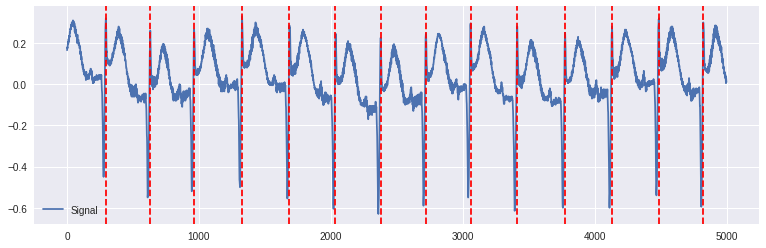

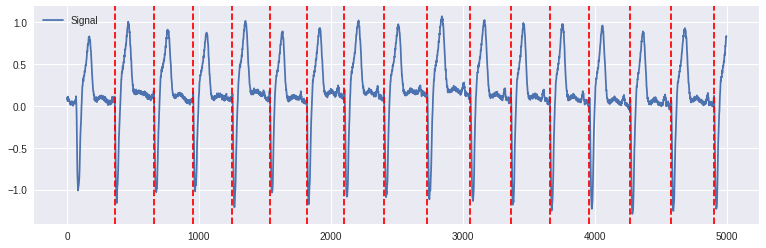

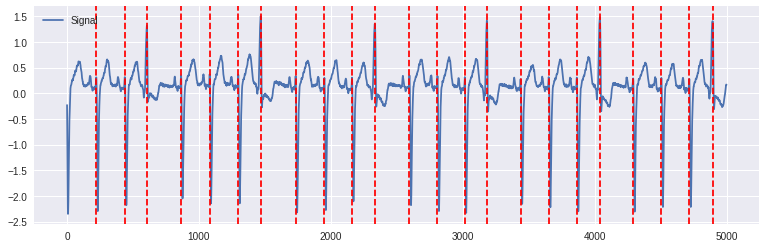

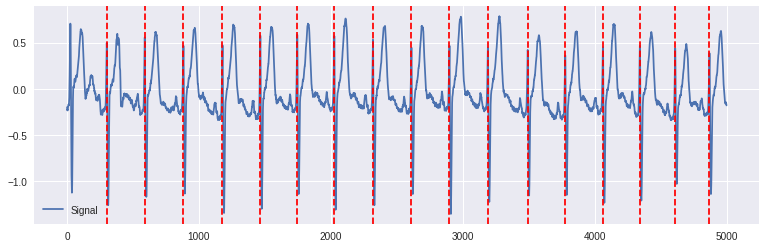

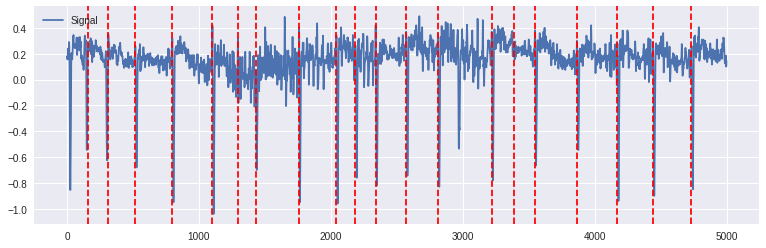

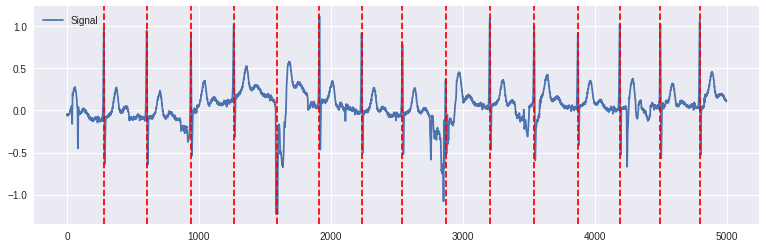

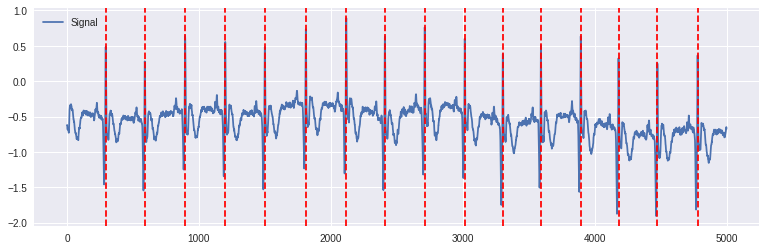

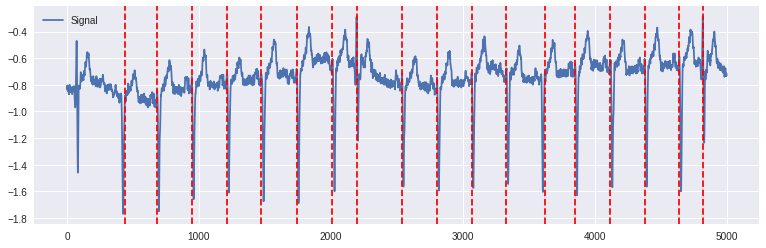

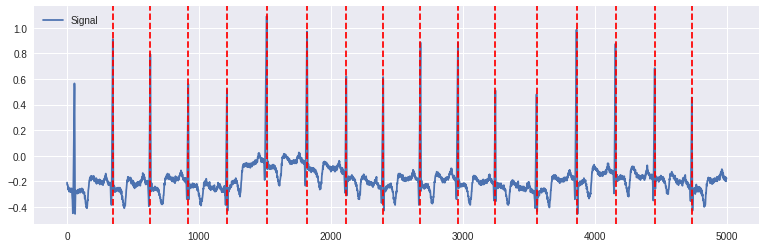

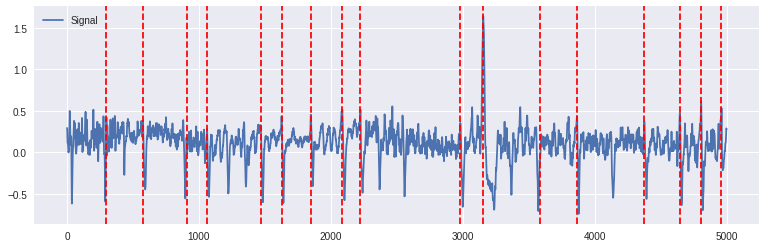

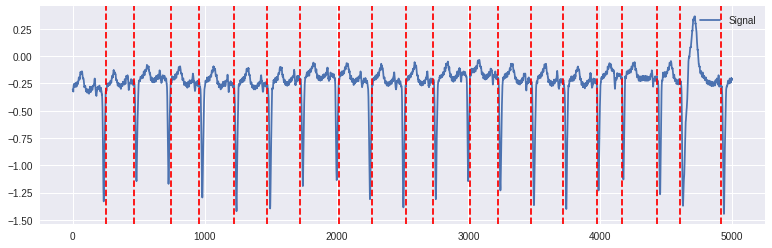

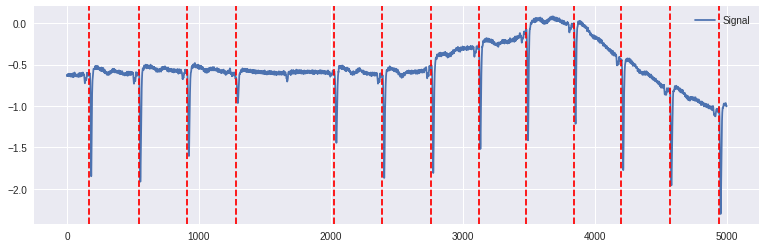

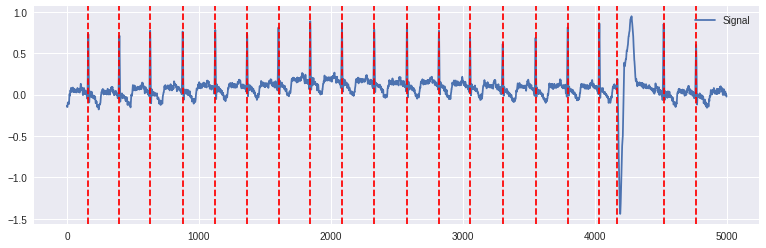

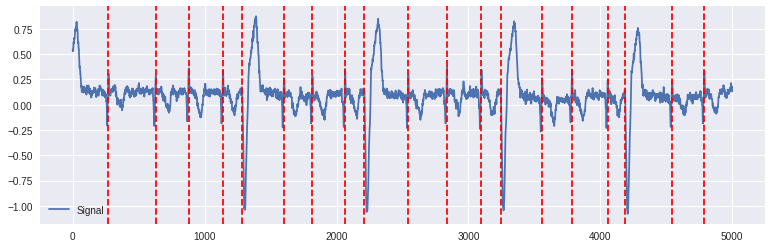

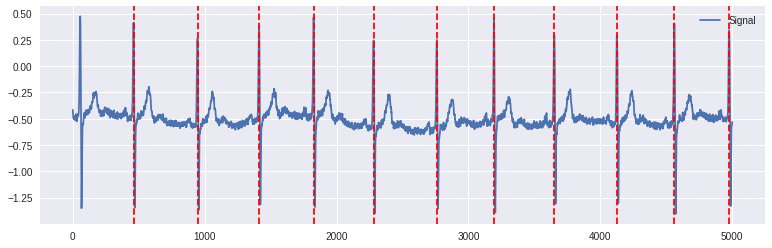

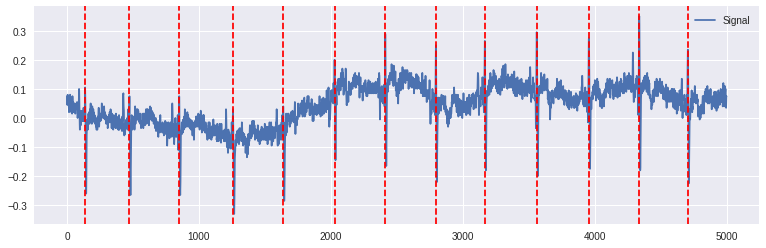

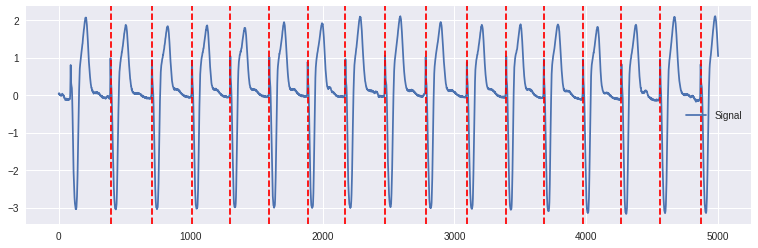

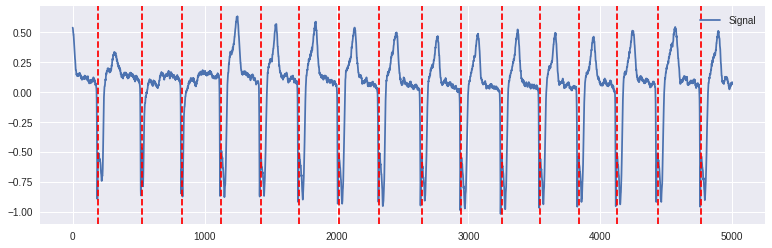

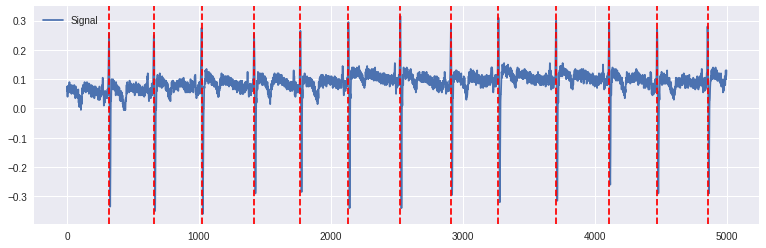

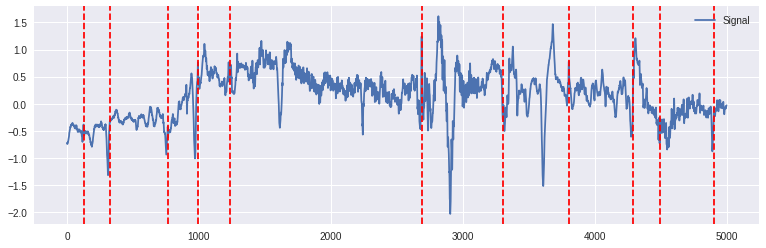

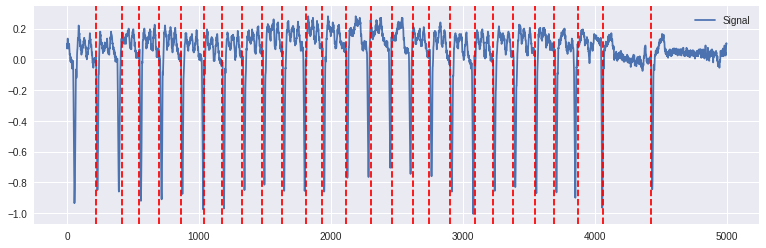

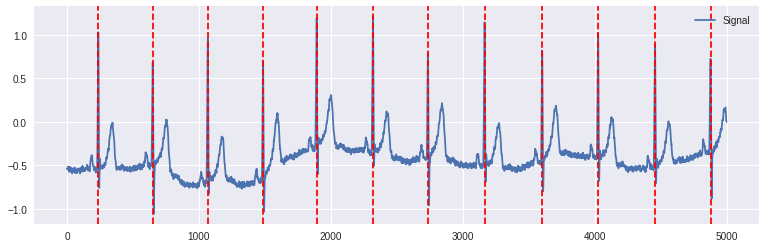

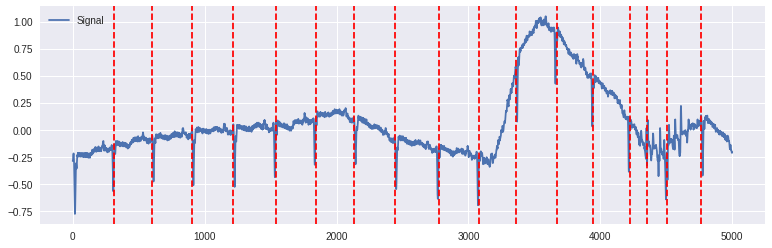

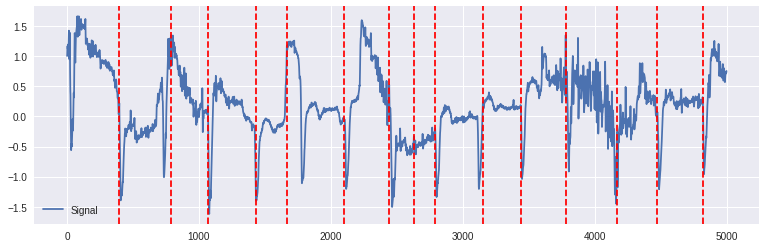

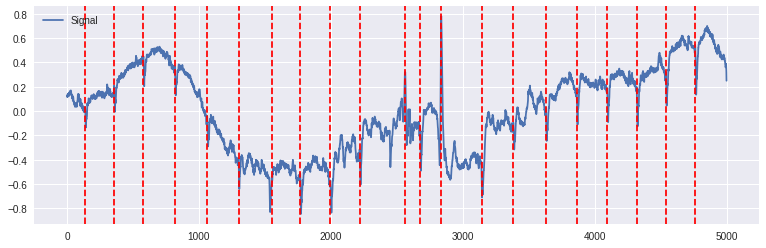

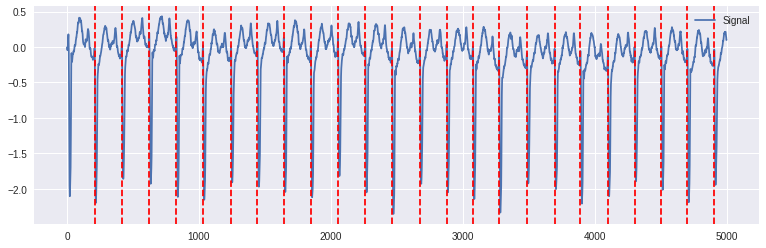

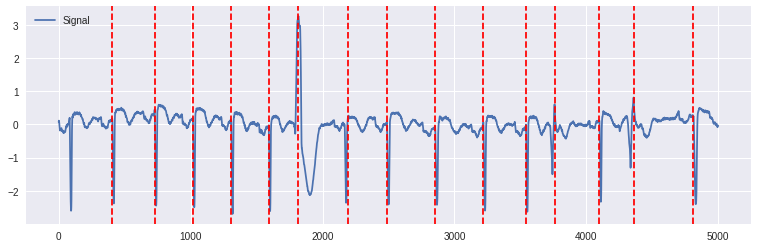

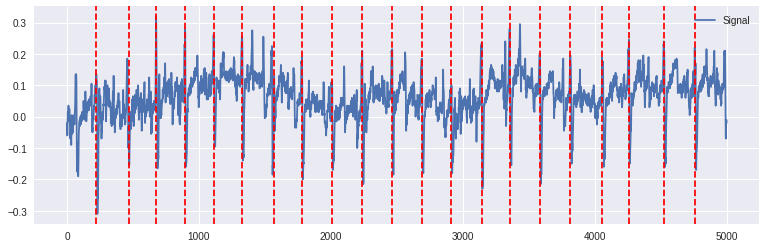

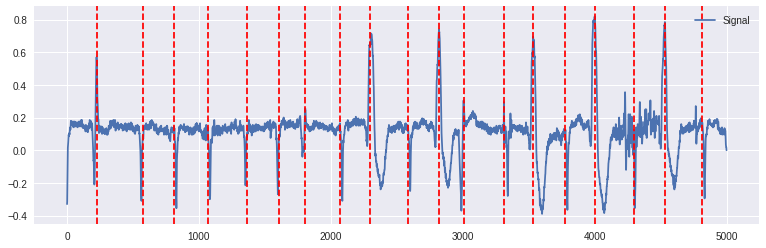

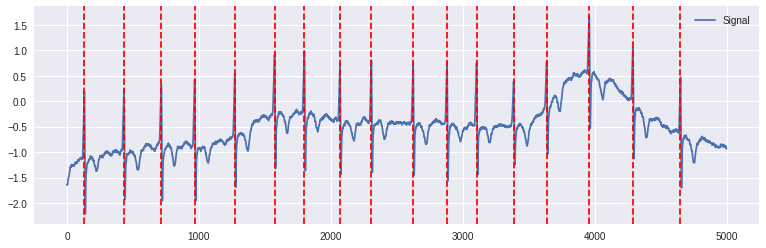

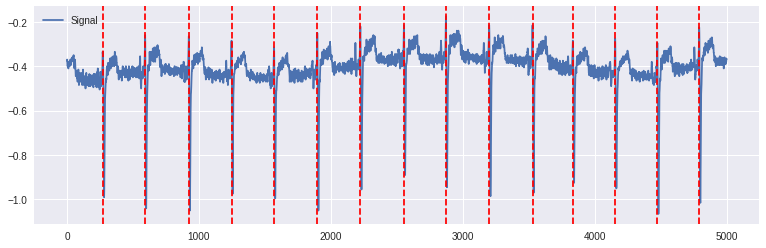

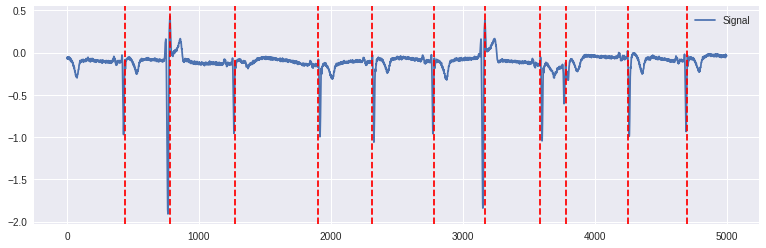

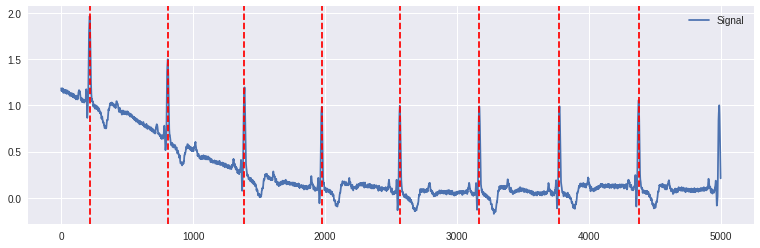

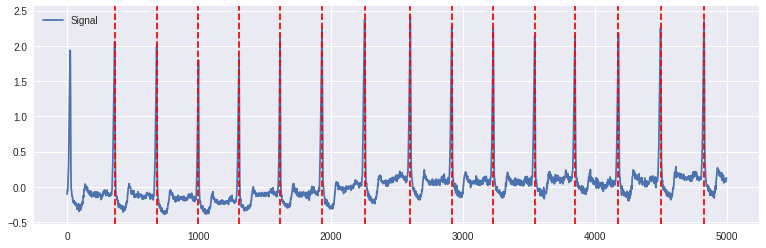

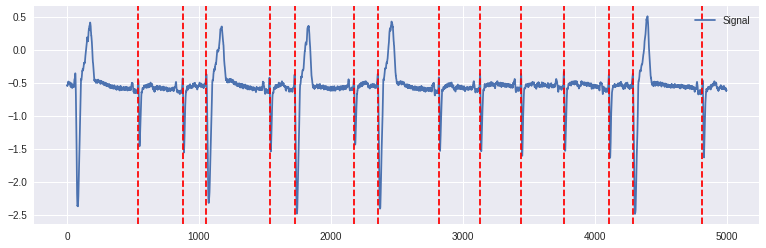

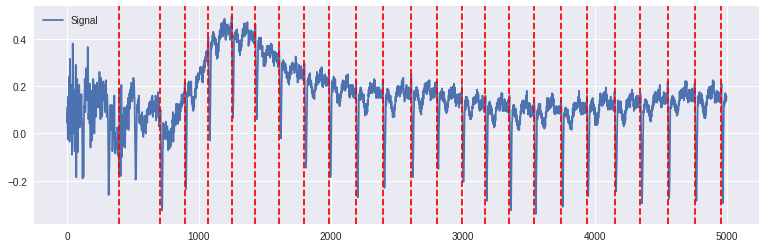

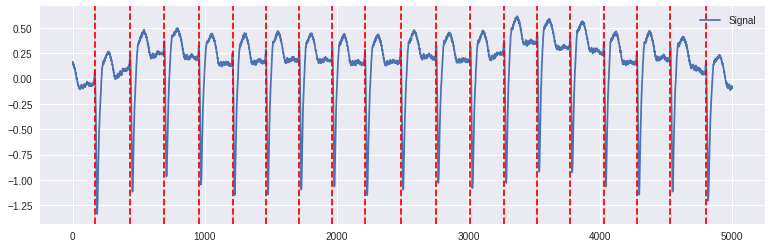

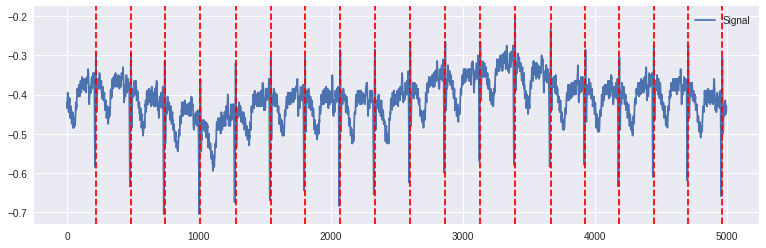

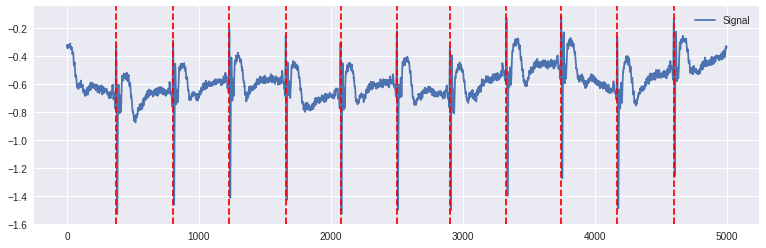

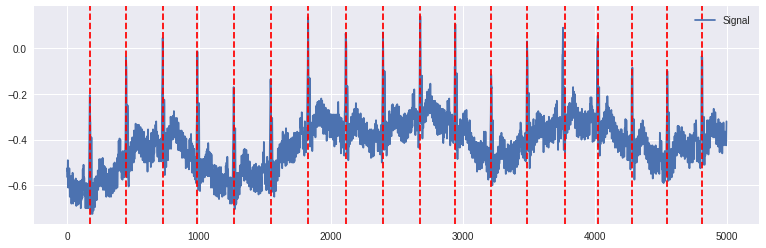

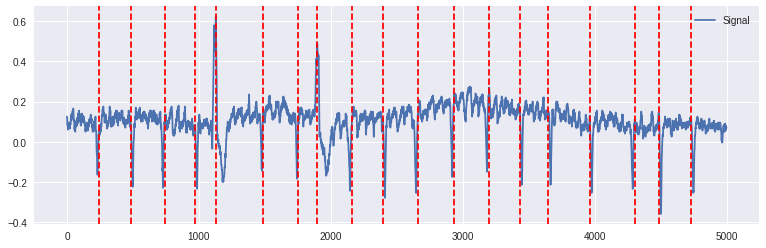

In [63]:
master_ecg = pd.read_csv("/content/ECGs_mitdb.csv")
list_of_patients = master_ecg['Participant'].unique()
data_with_rr = pd.DataFrame()

for i in tqdm(list_of_patients):
    df=master_ecg[master_ecg['Participant']==i]
    df.reset_index(inplace=True,drop=True)
    unfiltered_ecg=df["ECG"][:5000]
    _, rpeaks = nk.ecg_peaks( unfiltered_ecg, sampling_rate=360) #specify smapling rate
    r_peaks = rpeaks['ECG_R_Peaks']
    # nk.events_plot(rpeaks['ECG_R_Peaks'][rpeaks['ECG_R_Peaks']<=2000], unfiltered_ecg[0:2000])
    nk.events_plot(rpeaks['ECG_R_Peaks'],unfiltered_ecg)

    rrintervals = np.array(r_peaks)
    rr_diff = rrintervals
    rr_in_df = pd.DataFrame(rr_diff)
    rr_in_df['Participant']=i
    data_with_rr=data_with_rr.append(rr_in_df)
data_with_rr.columns=['Rpeaks','Participant']

data_with_rr.to_csv("RR_Arr_Neuro.csv",index=False)

##### Pan Tompkins on MIT Arrhythmia

 42%|████▏     | 20/48 [00:34<00:25,  1.08it/s]/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
 44%|████▍     | 21/48 [00:35<00:23,  1.16it/s]/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
 46%|████▌     | 22/48 [00:35<00:20,  1.25it/s]/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/co

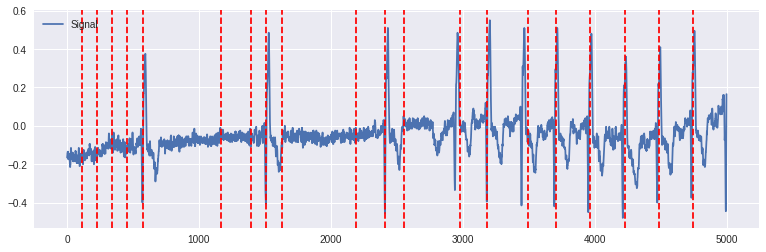

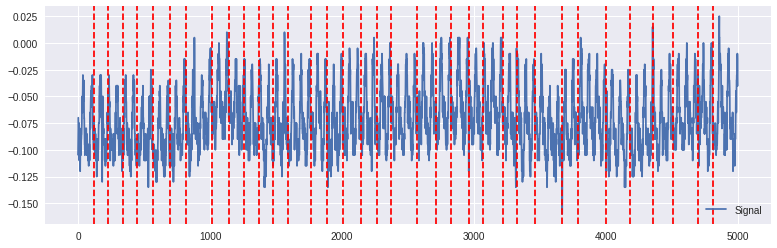

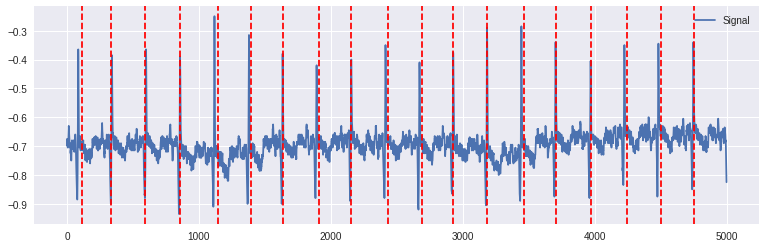

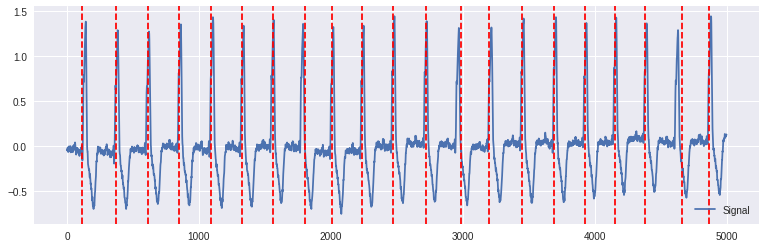

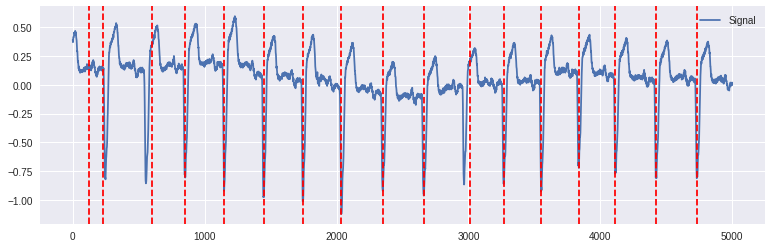

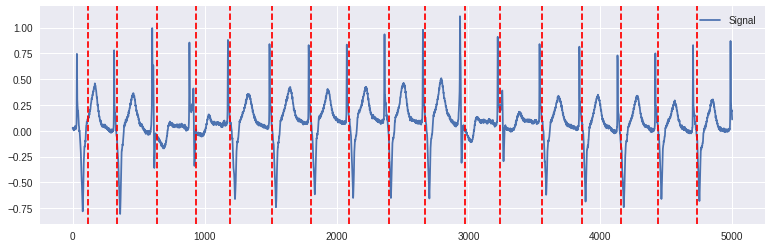

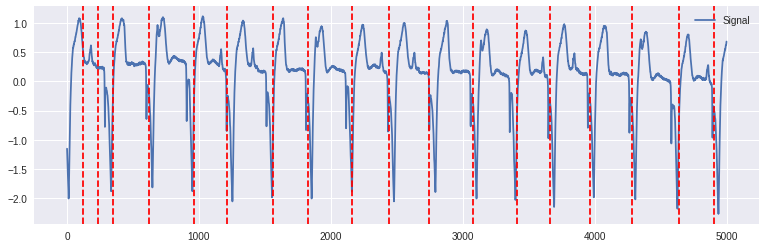

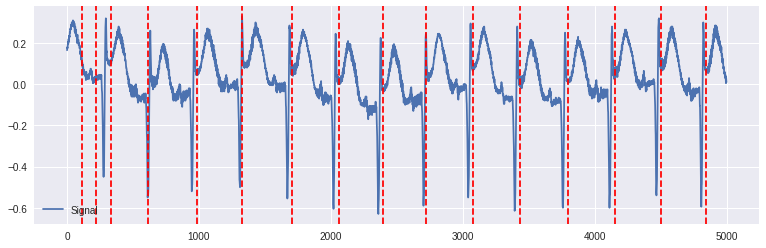

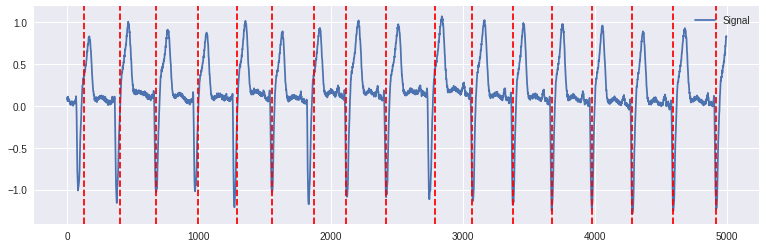

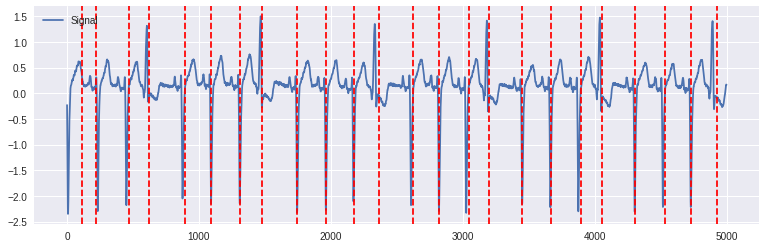

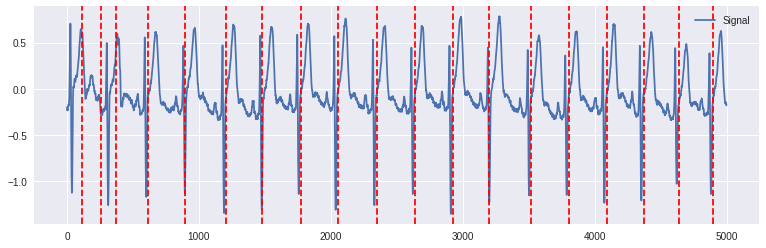

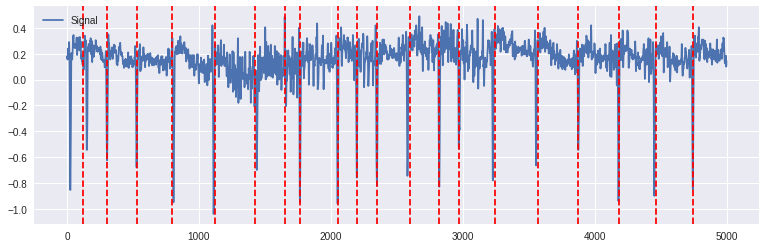

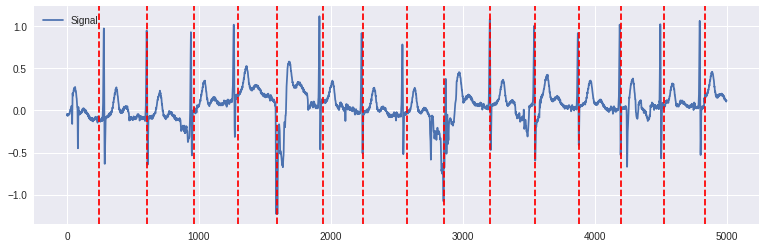

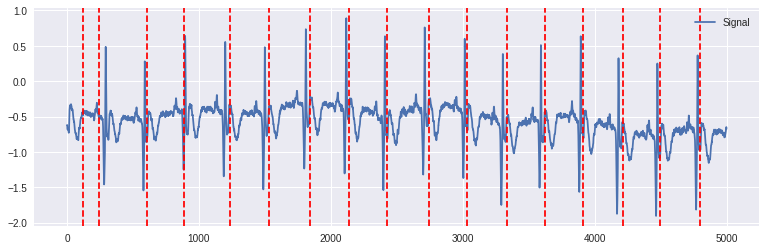

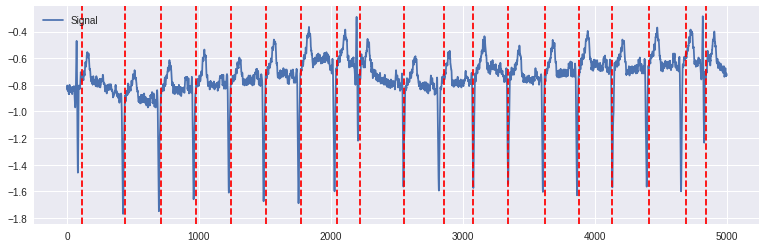

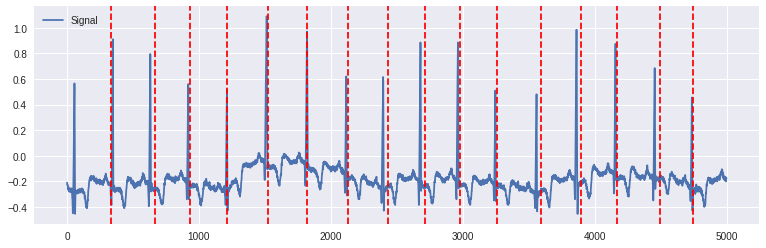

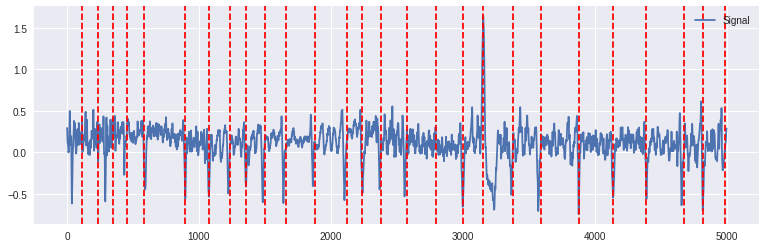

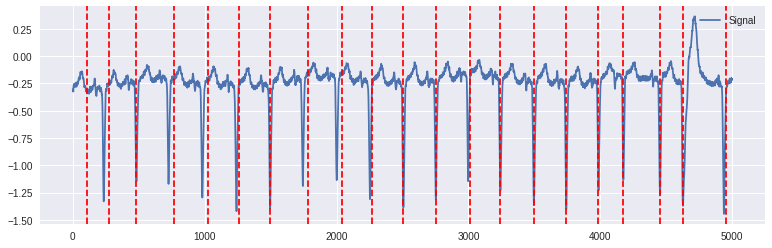

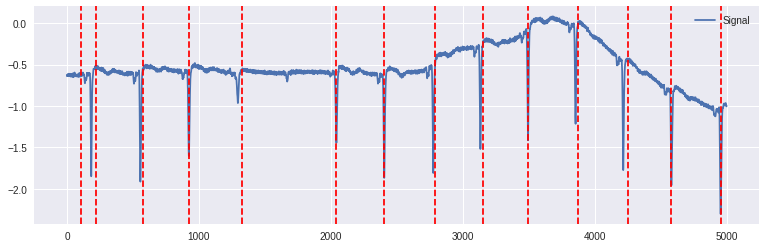

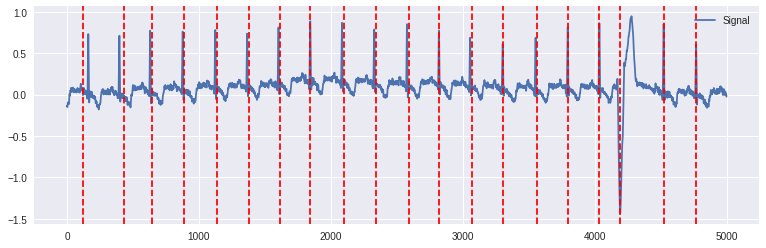

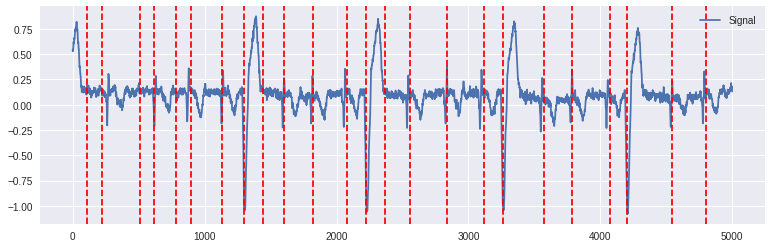

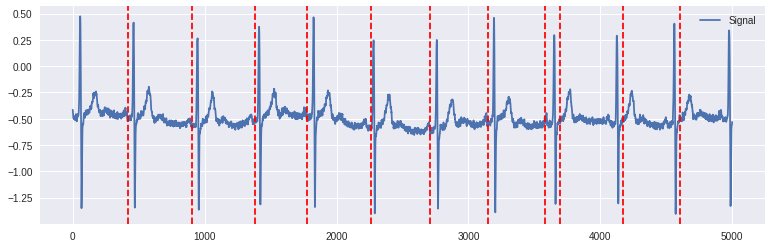

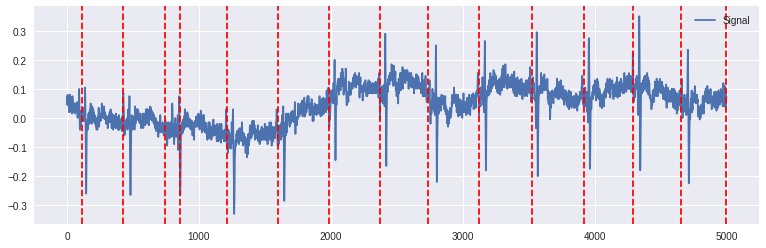

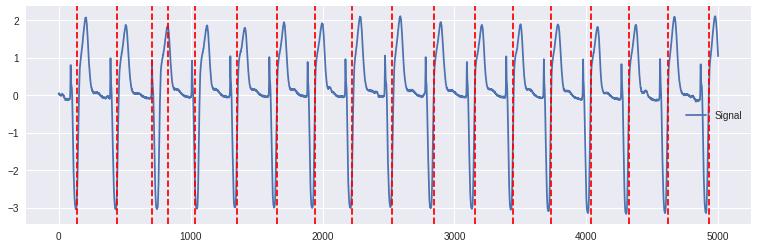

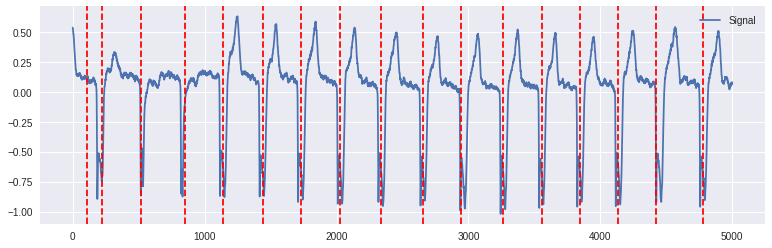

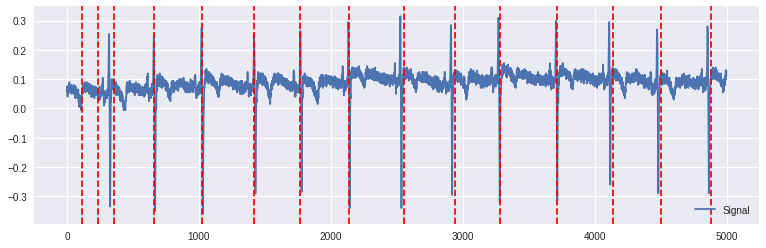

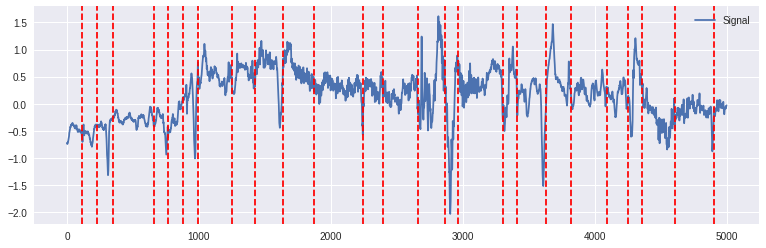

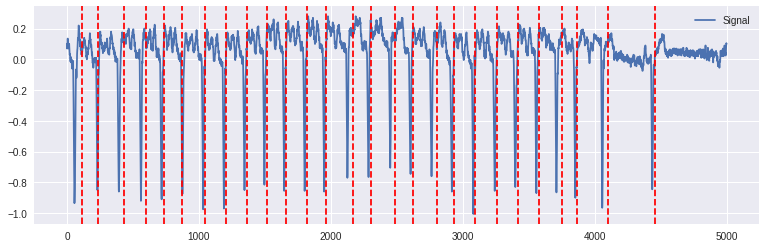

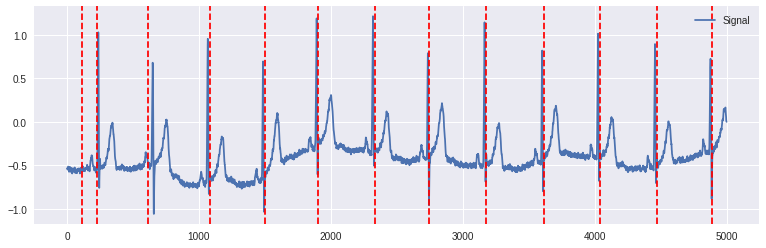

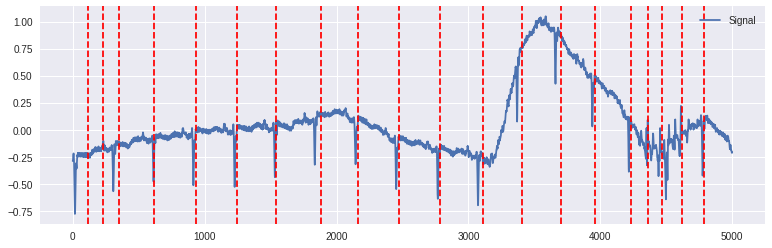

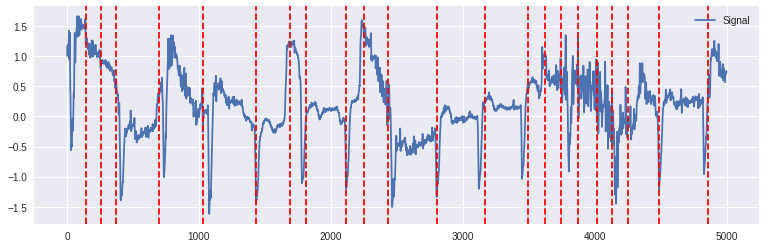

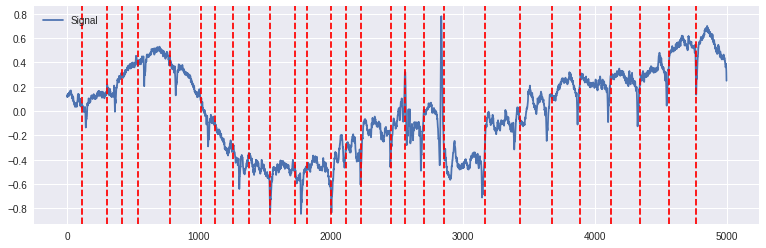

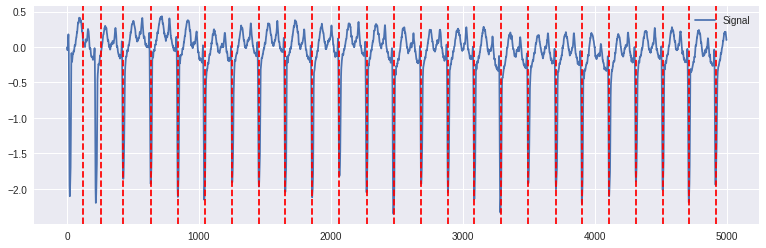

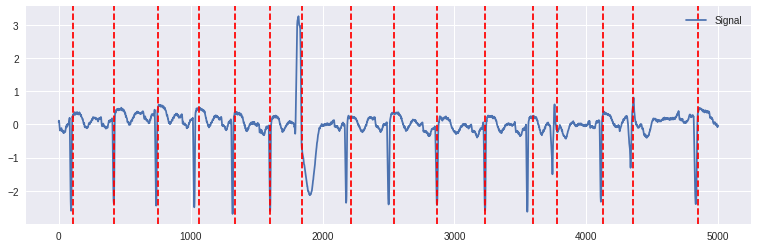

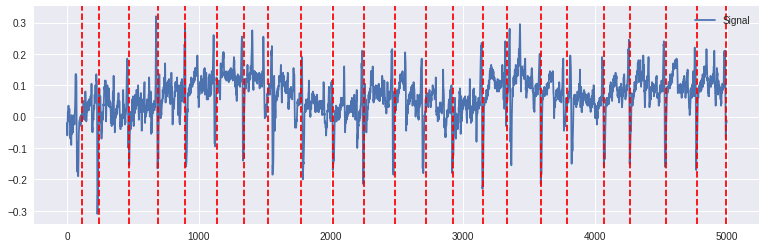

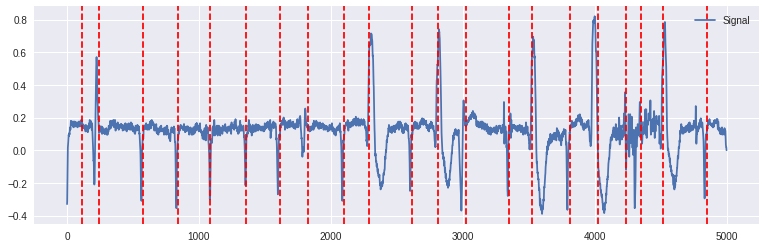

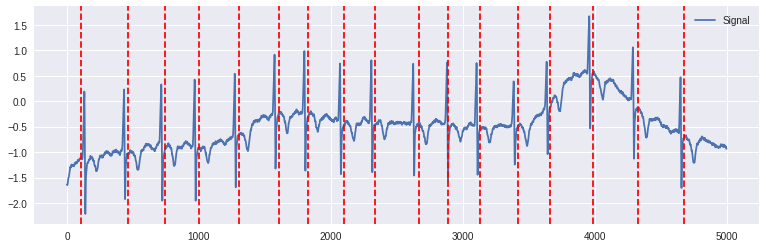

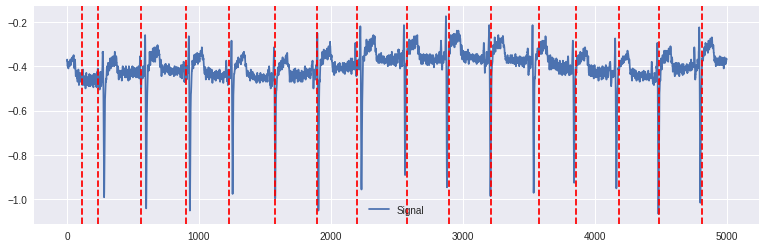

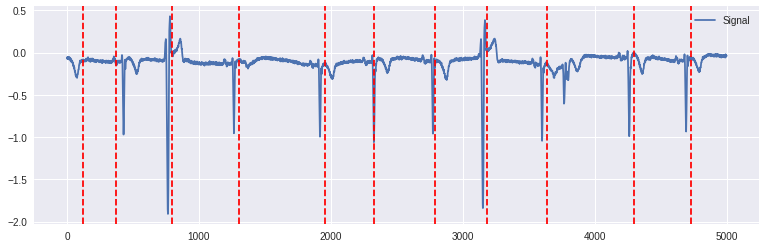

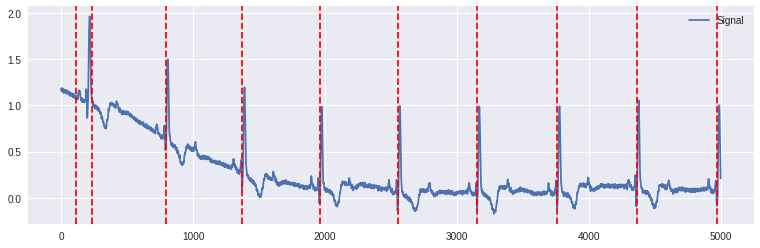

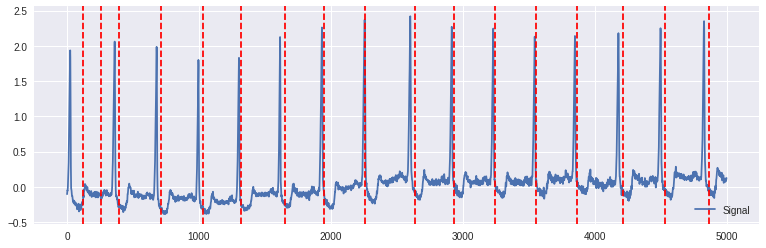

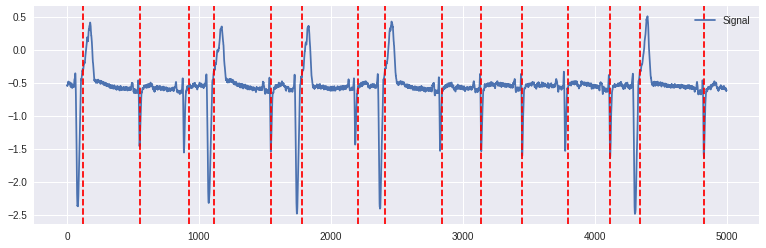

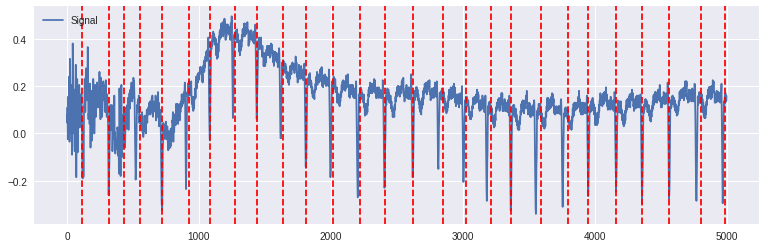

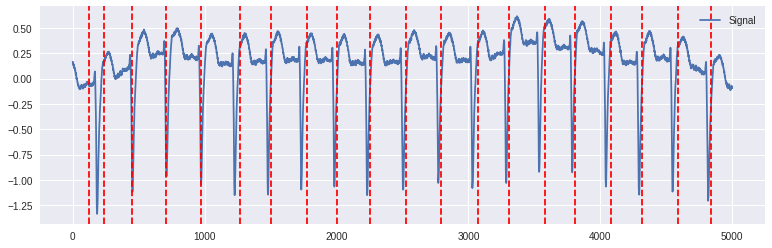

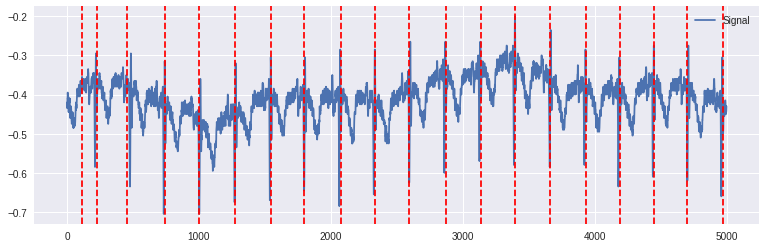

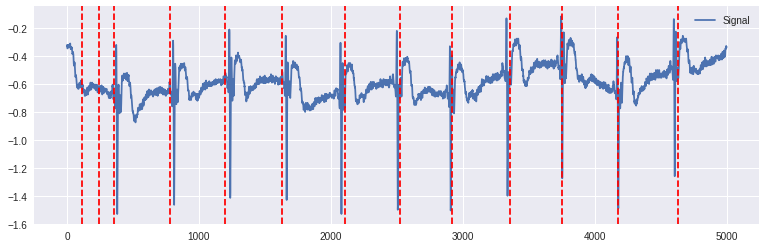

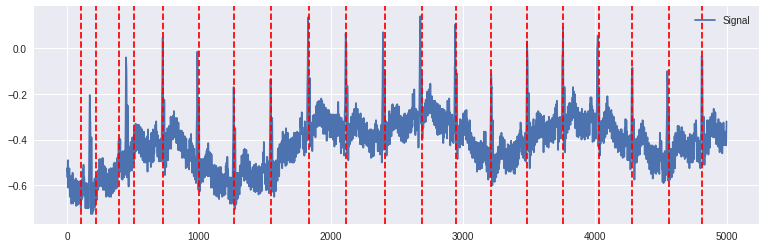

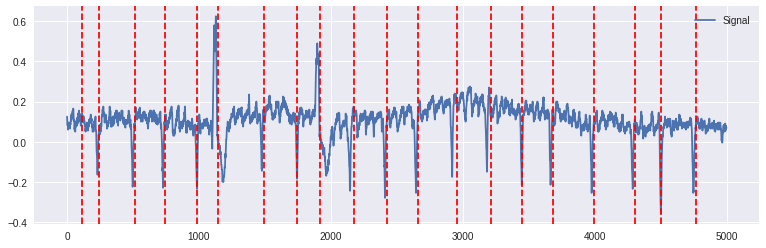

In [64]:
data_with_rr = pd.DataFrame()
detectors = Detectors(360) #specify sampling rate
for i in tqdm(list_of_patients):
    df=master_ecg[master_ecg['Participant']==i][:5000]
    df.reset_index(inplace=True,drop=True)
    unfiltered_ecg=df["ECG"]
    detector = "pan_tompkins"
    if(detector=="pan_tompkins"):
      rpeaks = detectors.pan_tompkins_detector(unfiltered_ecg)
    elif(detector=="stationary_wavelet_transform"):
      rpeaks = detectors.swt_detector(unfiltered_ecg)
    nk.events_plot(rpeaks,unfiltered_ecg)
    rrintervals = np.array(rpeaks)
    rr_diff = rrintervals
    rr_in_df = pd.DataFrame(rr_diff)
    rr_in_df['filename']=i
    data_with_rr=data_with_rr.append(rr_in_df)
    

data_with_rr.to_csv("RR_Arr_Pan_Tompkins.csv",index=False)